<h3> Estymacja parametrów i testowanie hipotez odnośnie rozkładu

In [1]:
options(repr.plot.width=3, repr.plot.height=3)

<h4> Metoda największej wiarygodności i metoda momentów

<h4> Zadanie1: Dane są następujące wyniki 4,2,4,5,7,2,3,5,4,2,1,5,1,4,2,2,3,5,3,0. Zakładajac, że pochodzą one z rozkładu Poissona oszacuj parametr $\lambda$ (metoda momentów).

<h4> Zadanie2: Dane są następujące wyniki 0.272,0.147,0.146,0.038,0.444,0.032,0.014,0.737,0.078,0.082,0.304,0.383,0.004,0.099,0.399, 0.434,0.07,0.006,0.173,0.408. Zakładając, że dane pochodzą z rozkładu wykładniczego oszacuj parametr $\lambda$ (metoda momentów).

<h4> Zadanie3: Wykonaj poprzednie zadanie metodą największej wiarygodności (na kartce). Porównaj uzyskany wynik z tym z zadania2.

- W R zostala zaimplementowana metoda najwiekszej wiarygodnosci.

In [42]:
x = c(1,1,5,5,3)
library(MASS)
fitdistr(x, "exponential")

     rate   
  0.3333333 
 (0.1490712)

* W przypadku danych z rozkładu normalnego, aproksymacją $\mu$ jest średnia z danych, a dla $\sigma$ jest to odchylenie (wynika to zarówno z metody momentów jak i metody największej wiarygodności).

<h4> Metoda Bootstrap

In [3]:
dane = rnorm(100, 5, 2) #generuje 100 liczb z rozkladu normalnego N(5,2)
print(dane[1:10])

 [1] 4.681504 5.244173 8.072208 1.656643 5.054929 6.212307 1.991581 6.846717
 [9] 6.558865 4.945263


In [4]:
mean(dane); sd(dane)

[1] 4.834331

[1] 2.126079

In [5]:
replikanty = lapply(1:100, function(i) sample(dane, 100, replace = T)) #generuje 100 nowych probek poprzez losowanie z powtorzeniem z pierwotnej proby
print(replikanty[[1]]) #pierwsza taka probka

  [1]  6.156537632  4.544071021  4.793677331  5.528285667  7.556935866
  [6]  2.549277391  4.474777777  5.956714737  6.492085819  3.478322383
 [11]  4.056543006 10.273475455  6.492085819  6.715712753  5.543073143
 [16]  3.892450753  4.210826452  5.956714737  5.054928721  2.619513910
 [21]  4.694001256  7.550104257  2.191292705  5.054928721  5.993044659
 [26]  3.267346646  6.104972237  0.007730757  3.214130761  1.355379087
 [31]  4.485835742  6.558864793  1.986390946  7.837430289  3.214130761
 [36]  5.012280919  4.382653507  1.500671824  6.938637152  5.845589735
 [41]  6.212306704  3.477136003  5.528285667  5.956714737  5.408924876
 [46]  4.652629956  4.050439965  4.681503914  4.924983481  6.492085819
 [51]  1.500671824  4.712804059  1.500671824  1.656643008  6.492085819
 [56]  5.543073143  2.283689336  4.837301045  2.608670979  1.355379087
 [61]  8.072207541  2.984713249  7.556935866  4.681503914  5.993044659
 [66]  4.331555693  7.837430289  8.072207541  4.050439965  0.007730757
 [71] 

In [6]:
r.mean = sapply(replikanty, mean) #srednia dla kolejnych probek
r.sd = sapply(replikanty, sd) #odchylenie dla kolejnych probek

Jaka jest średnia?

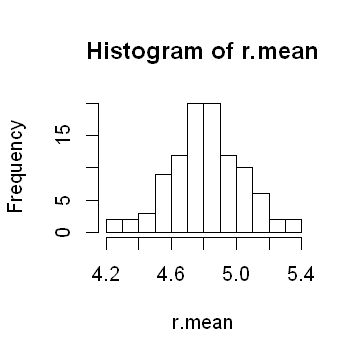

In [7]:
hist(r.mean)

In [8]:
mean(r.mean); sd(r.mean)

[1] 4.81391

[1] 0.2200751

In [9]:
quantile(r.mean, c(0.025, 0.975))

2.5%    97.5% 
4.388053 5.206982

Jakie jest odchylenie?

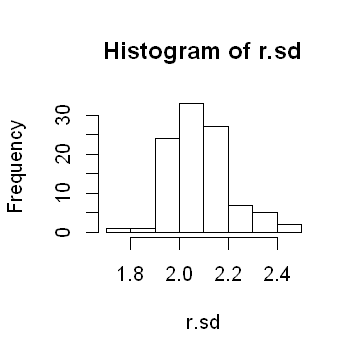

In [10]:
hist(r.sd)

In [11]:
mean(r.sd); sd(r.sd)

[1] 2.084667

[1] 0.1204268

In [12]:
quantile(r.sd, c(0.05/2, 1-0.05/2))

2.5%    97.5% 
1.902563 2.340101

- Oczywiście metoda Bootstrap zostala zaimplementowana w R.

In [13]:
library(boot)
dane2 = data.frame(x=dane)
head(dane2)

x
4.681504
5.244173
8.072208
1.656643
5.054929
6.212307


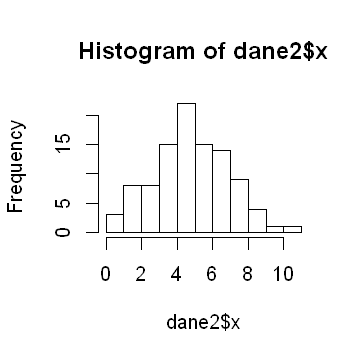

In [14]:
hist(dane2$x)

In [15]:
mean(dane2$x)

[1] 4.834331

In [16]:
srednia = function(d, w) sum(d$x * w) #drugi argument to częstosci dla poszczegolnych elementow w kolejnej replikacji
wynik_boot = boot(dane2, srednia, R=999, stype="w")
quantile(wynik_boot$t, c(0.05/2, 1-0.05/2))

2.5%    97.5% 
4.402886 5.249495

<h3> Testowanie hipotez odnośnie rozkładu

<h4> Testowanie normalności

In [36]:
#Shapiro Test - liczona jest pewna statystyka i porownywana z wartoscia teoretyczna

x = rnorm(30, 2, 1)
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.95862, p-value = 0.2855


<h4> QQplot

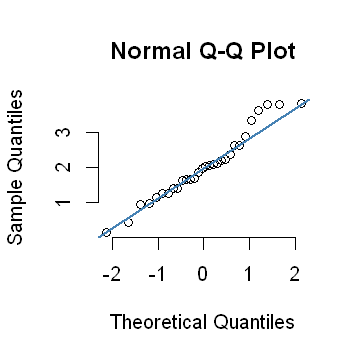

In [37]:
#wykres typu QQ (qqplot) - wykres zaleznosci kwantyli z rozawaznego rozkladu a kwantyli rozkaldu normalnego

qqnorm(x, pch = 1, frame = FALSE) #rzeczywiste porownanie
qqline(x, col = "steelblue", lwd = 2) #jak powinno byc

<h4> Zadanie4: Wygeneruj 100 obserwacji z rozkładu jednostajnego $Unif(-2,2)$, a następnie:
    
    
    
    
    
- wykonaj test Shapiro-Wilka 
- narysuj wykres typu QQplot 
    
    
    
    
Skomentuj otrzymane wyniki.

<h4> Test Smirnov-Kolomogorov

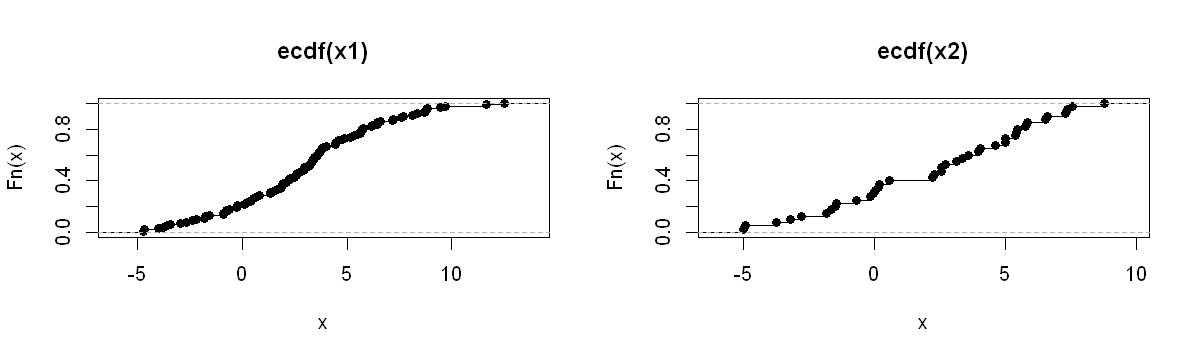

In [19]:
#Kolmogorov-Smirnov Test - porownuje wartosci dystrybuanty #raczej dla rozkladow ciąglych

x1 = rnorm(100, 3, 4)
x2 = rnorm(40, 3, 4)

options(repr.plot.width=10, repr.plot.height=3)
par(mfrow=c(1,2))
plot(ecdf(x1));plot(ecdf(x2))

In [20]:
ks.test(x1,x2) 


	Two-sample Kolmogorov-Smirnov test

data:  x1 and x2
D = 0.155, p-value = 0.4628
alternative hypothesis: two-sided


<h4> Zadanie5: Wygeneruj 200 liczb z rozkładu $N(3,1)$ oraz kolejne 200 z $Unif(2,4)$. Porównaj dystrybuanty danych i wykonaj KS test. Skomentuj otrzymane wyniki.

- Rozkład geometryczny w sekwencjach biologicznych

In [4]:
x = sample(c("A","T","G","C"), 10000, rep = T) #generuje losową sekwencje nt
t = which(x %in% c("A")) #na ktorych pozycjach są "A"
roznice_A = diff(t) -1 
p = 1/mean(roznice_A)

In [8]:
dane = data.frame(nt = roznice_A, geo = rgeom(length(roznice_A), p))
head(dane)

nt,geo
1,3
8,0
5,4
4,0
0,3
0,3


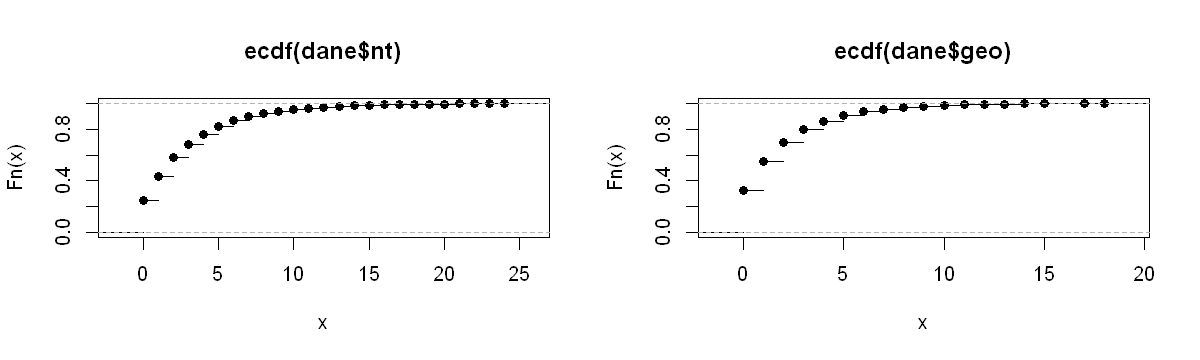

In [23]:
par(mfrow=c(1,2))
plot(ecdf(dane$nt)); plot(ecdf(dane$geo))

<h4> Zadanie6: Pobierz dane $cw4.txt$, które przedstawiają wzrost w pewnej populacji. Czy można przyjąć, że dane te pochodzą z rozkładu normalnego? Jeżeli tak, to oszacuj parametry tego rozkładu. Jakie jest prawdopdobieństwo, że wzrost przekroczy 180 w tej populacji?